
# MACHINE LEARNING PROJECT: MOBILE PHONE PRICE PREDICTION

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

**Data Description**

*   id: ID

*   battery_power: Total energy a battery can store in one time measured in mAh

*   blue: Has bluetooth or not

*   clock_speed: speed at which microprocessor executes instructions

*   dual_sim: Has dual sim support or not

*   fc: Front Camera mega pixels

*   four_g: Has 4G or not

*   int_memory: Internal Memory in Gigabytes

*   m_dep: Mobile Depth in cm

*   mobile_wt: Weight of mobile phone

*   n_cores: Number of cores of processor
*   pc: Primary Camera mega pixels


*   px_height: Pixel Resolution Height


*   px_width: Pixel Resolution Width


*   ram: Random Access Memory in Megabytes   


*   sc_h: Screen Height of mobile in cm


*   sc_w: Screen Width of mobile in cm


*   talk_time: longest time that a single battery charge will last when you are


*   three_g: Has 3G or not


*   touch_screen: Has touch screen or not

*   wifi: Has wifi or not
*   price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)




In [1]:
# The libraries & modules which we are going to use in our study:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score,precision_score,f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# importing file
df=pd.read_csv("/content/drive/MyDrive/ALMA BETTER/Copy of data_mobile_price_range.csv")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [8]:
# shape of dataset
df.shape

(2000, 21)

In [9]:
# lets look at the columns/features in dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
# null count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# checking null value
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Dataset does not have any Null value

In [ ]:
# basic info of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


<Axes: >

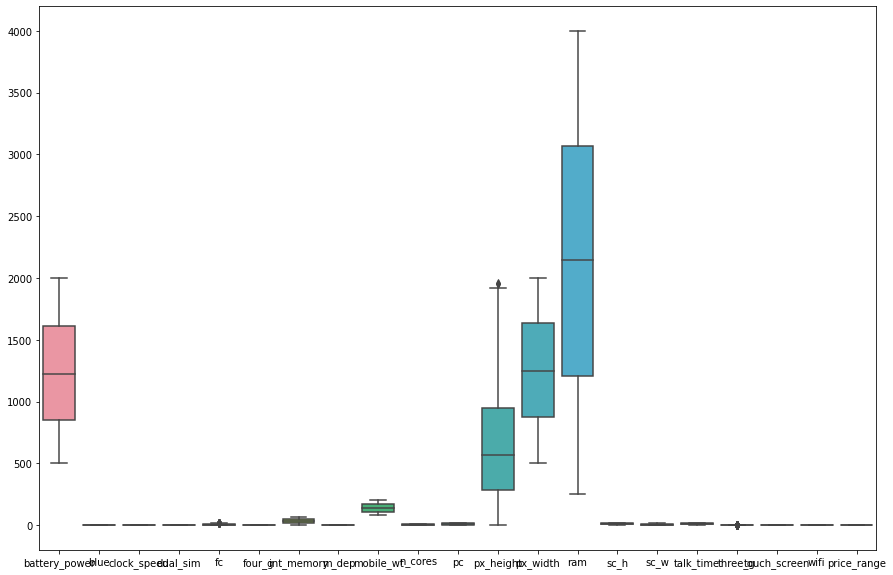

In [12]:
# Visualizing outlier
plt.figure(figsize= (15,10))
sns.boxplot(data=df)

<ipython-input-13-e70c4663929c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize= (7,5))


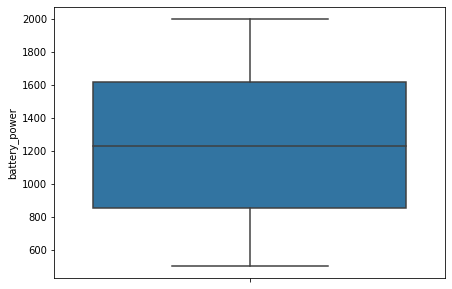

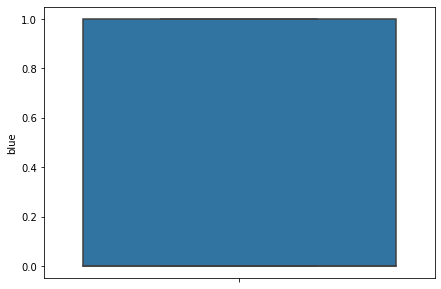

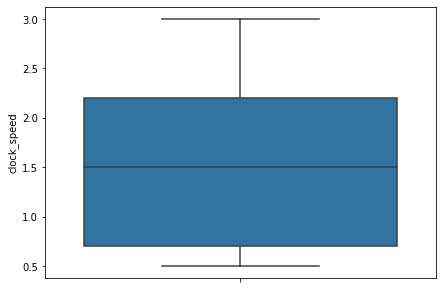

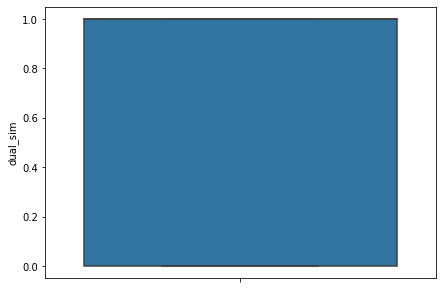

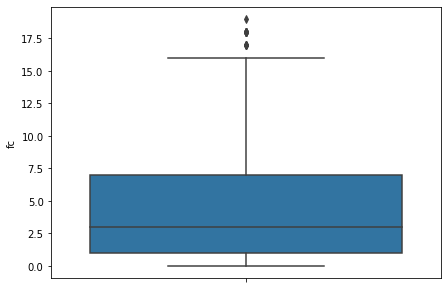

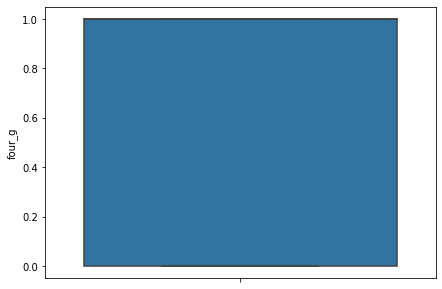

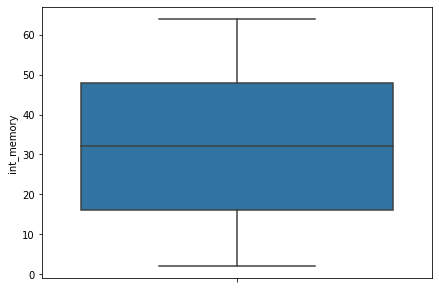

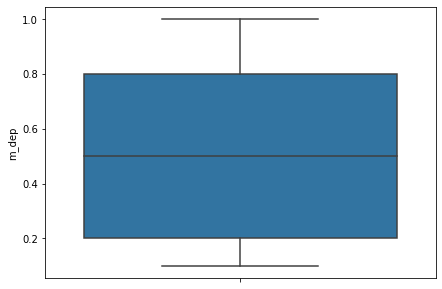

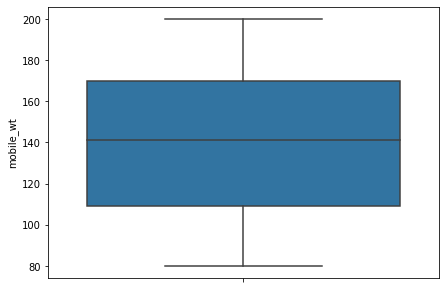

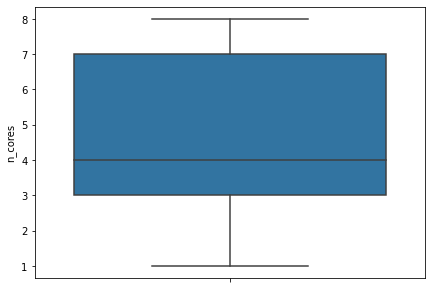

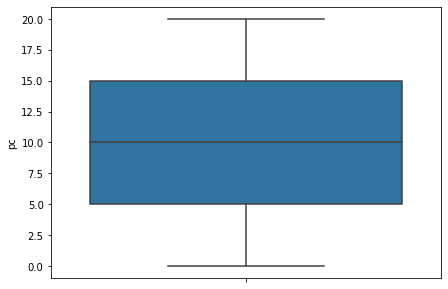

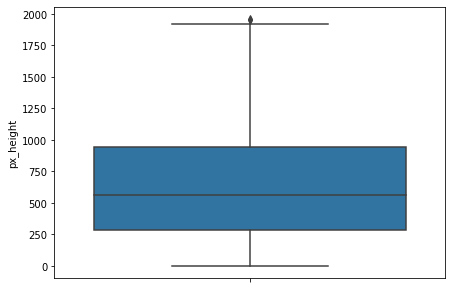

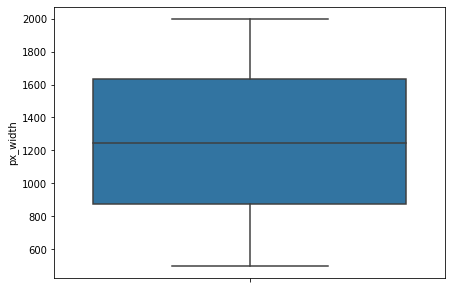

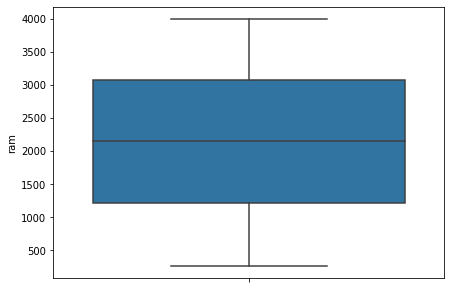

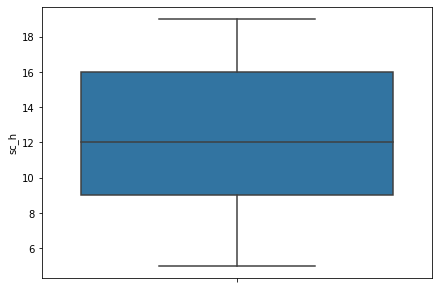

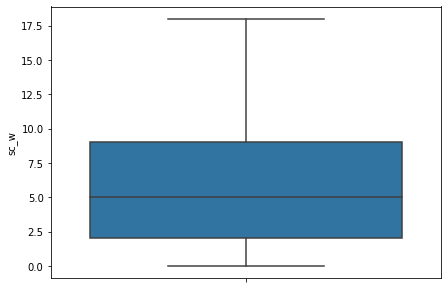

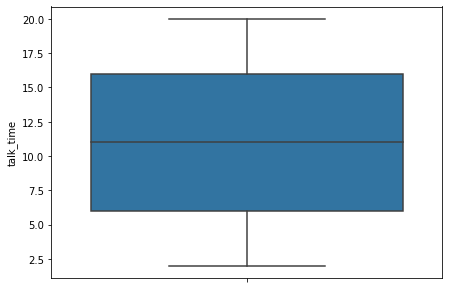

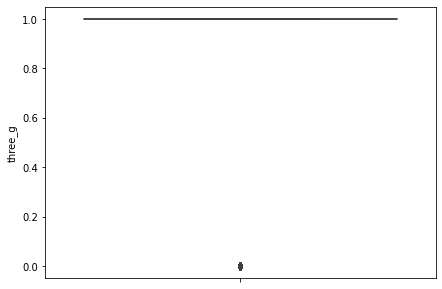

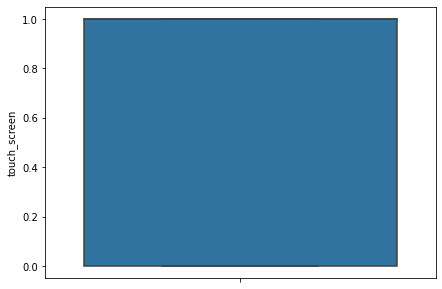

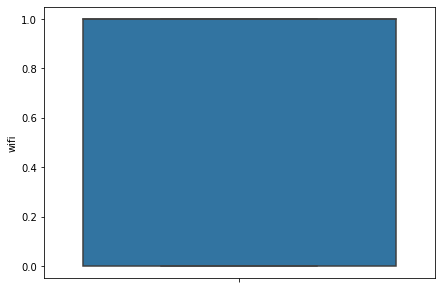

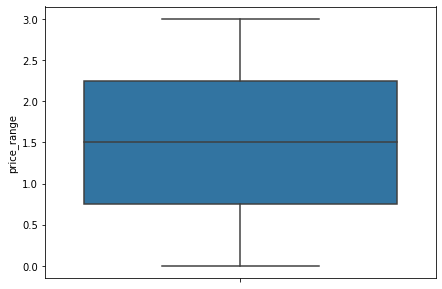

In [13]:
# checking outliers column wise visualization
for col in df:
  plt.figure(figsize= (7,5))
  sns.boxplot(y = df[col])
plt.show()

Dataset is evenly distributed and does not have any outlier.

In [14]:
#checking duplicate rows
len(df[df.duplicated()])

0

In [15]:
# no of unique values in each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

**DATA VISUALIZATION**

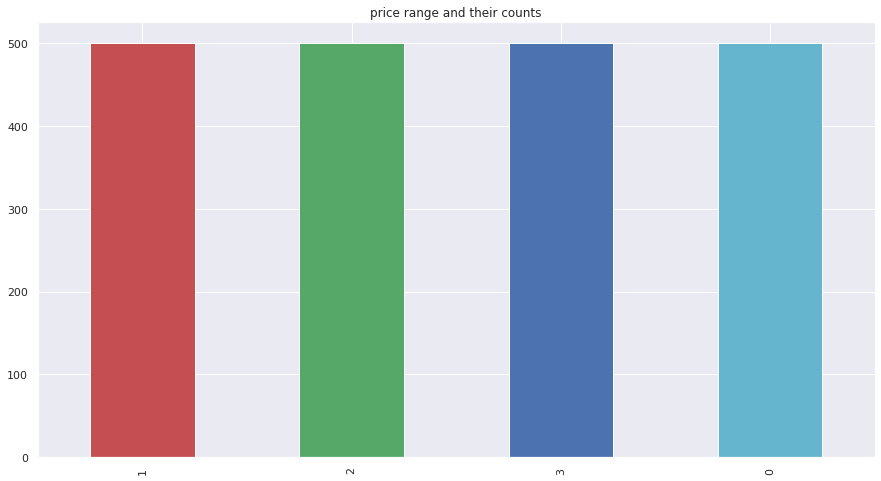

In [16]:
#Lets check the label class  of price range and their counts.
df["price_range"].value_counts()
plt.figure(figsize=(15,8))
sns.set()
df.price_range.value_counts().plot( kind='bar', color=list('rgbc'),)
plt.title("price range and their counts")
plt.show()



*   There are 4 types of mobile phones ,their price range labeled as 0,1,2,3 and all are present in equal counts



Text(0, 0.5, 'Counts')

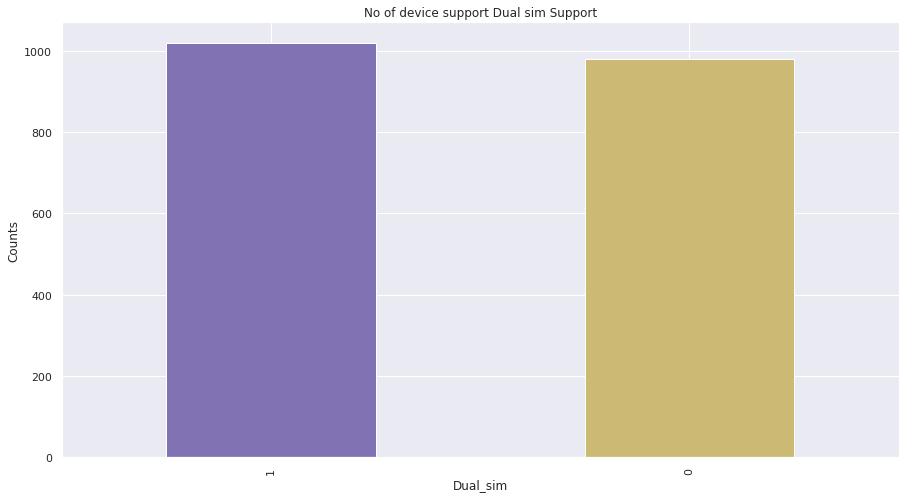

In [17]:
#Lets check how many device have dual sim Support
plt.figure(figsize=(15,8))
sns.set()
df.dual_sim.value_counts().plot(kind="bar",color=list('my'))
plt.title(
    'No of device support Dual sim Support'
)
plt.xlabel('Dual_sim')
plt.ylabel('Counts')

*Almost 50% of the mobile phones have dual sim.

Text(0, 0.5, 'Counts')

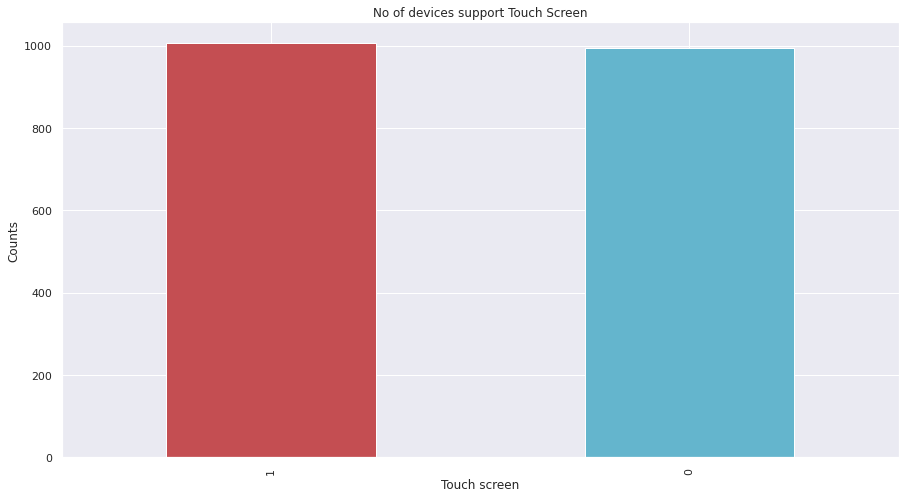

In [18]:
#Lets see how many devices are Touch Screen.
plt.figure(figsize=(15,8))
sns.set()
df.touch_screen.value_counts().plot(kind="bar",color=list('rc'))
plt.xlabel('Touch screen')
plt.title("No of devices support Touch Screen")
plt.ylabel('Counts')

*   Almost 50% of the mobile phones are Touch screen.

Text(0, 0.5, 'Counts')

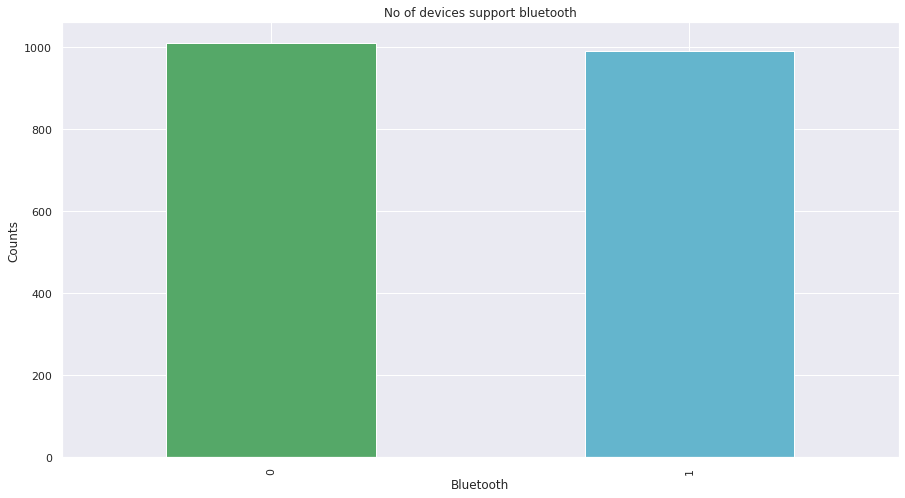

In [19]:
#Lets see how many devices Support bluetooth
plt.figure(figsize=(15,8))
sns.set()
df.blue.value_counts().plot(kind="bar",color=list('gc'))
plt.title("No of devices support bluetooth")
plt.xlabel('Bluetooth')
plt.ylabel('Counts')






*   Almost 50% of the mobile phones have bluetooth conectivity.



Text(0, 0.5, 'Counts')

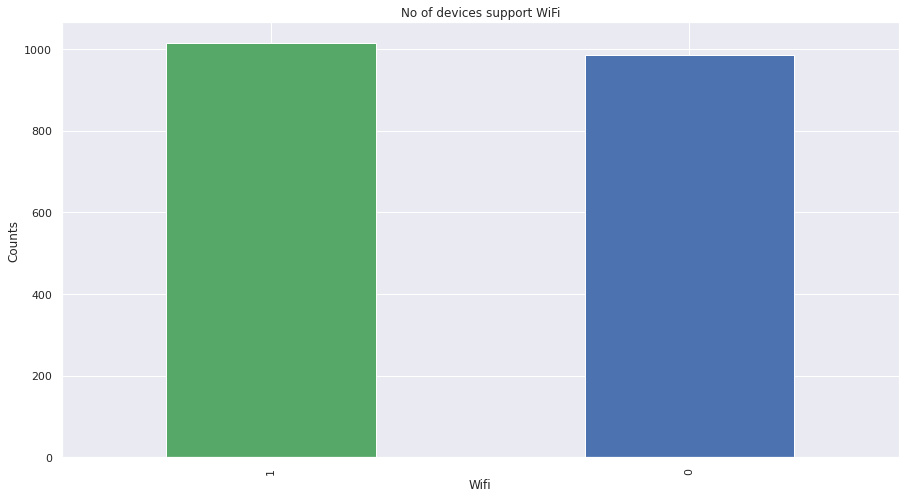

In [20]:
#Lets see  how many devices have WiFi connection
plt.figure(figsize=(15,8))
sns.set()
df.wifi.value_counts().plot(kind="bar",color=list('gb'))
plt.xlabel('Wifi')
plt.title("No of devices support WiFi")
plt.ylabel('Counts')

*   Almost 50% of the mobile phones have WiFI conectivity.





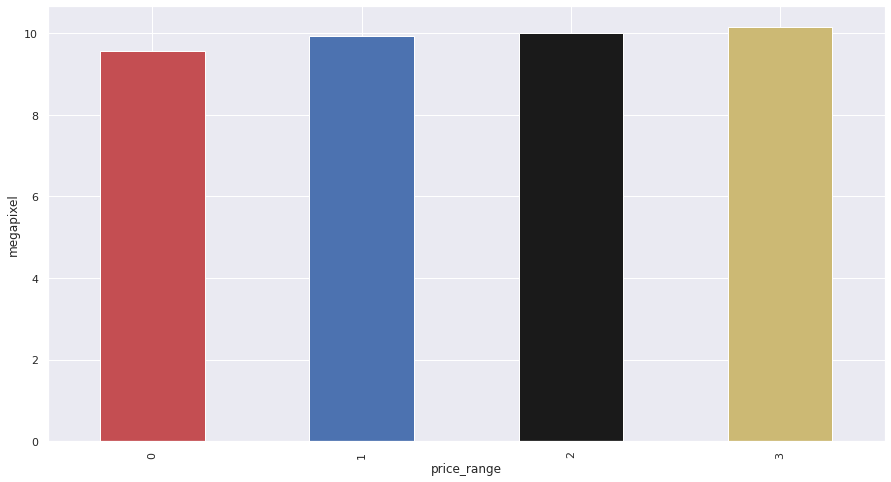

In [ ]:
# visualizing the average  megapixel according to their price range.
plt.figure(figsize=(15,8))
sns.set()
df.groupby("price_range")["pc"].mean().plot( kind='bar', color=list('rbky'),)
plt.ylabel("megapixel")
plt.show()

*For price range 0,1.2,3 the average megapixel is around 9 to 10 megapixel.

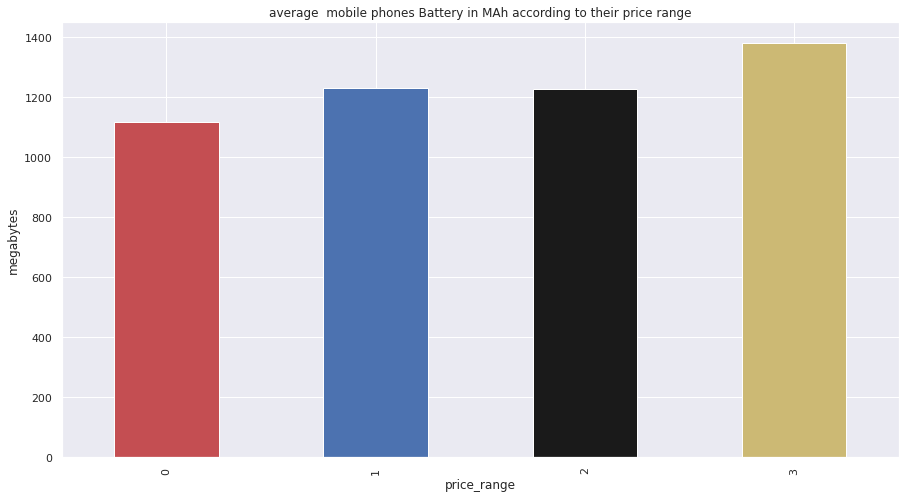

In [ ]:
# visualizing the average  mobile phones Battery in MAh according to their price range.
plt.figure(figsize=(15,8))
sns.set()
df.groupby("price_range")["battery_power"].mean().plot( kind='bar', color=list('rbky'),)
plt.title("average  mobile phones Battery in MAh according to their price range")
plt.ylabel("megabytes")
plt.show()

*For price range 0 the avg battery is around 1100 mAh, for price range 1 and 2 it's around 1230 mAh and for price range 3 it's around 1380 mAh

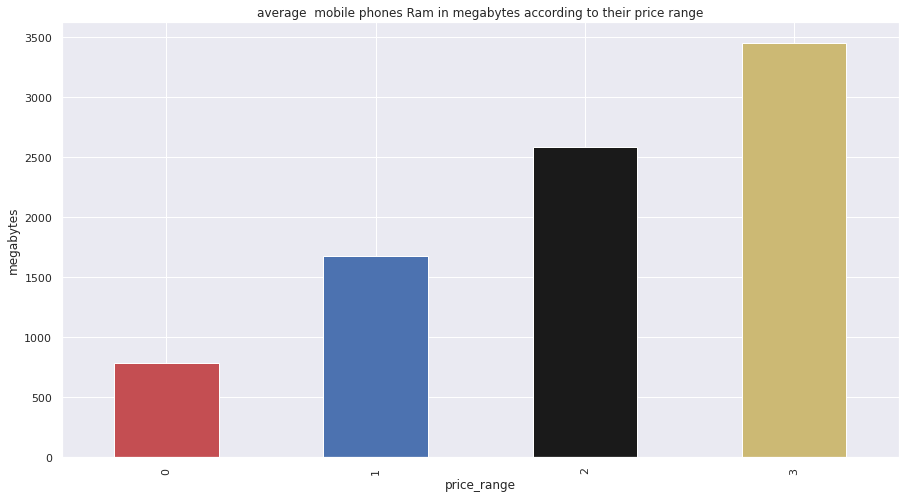

In [ ]:
# visualizing the average  mobile phones Ram in megabytes according to their price range.
plt.figure(figsize=(15,8))
sns.set()
df.groupby("price_range")["ram"].mean().plot( kind='bar', color=list('rbky'),)
plt.title("average  mobile phones Ram in megabytes according to their price range")
plt.ylabel("megabytes")
plt.show()



*   The average ram for price range 0,1,2,3 is approx 700,1650,2600 and 3400 megabytes respectively.




<AxesSubplot:>

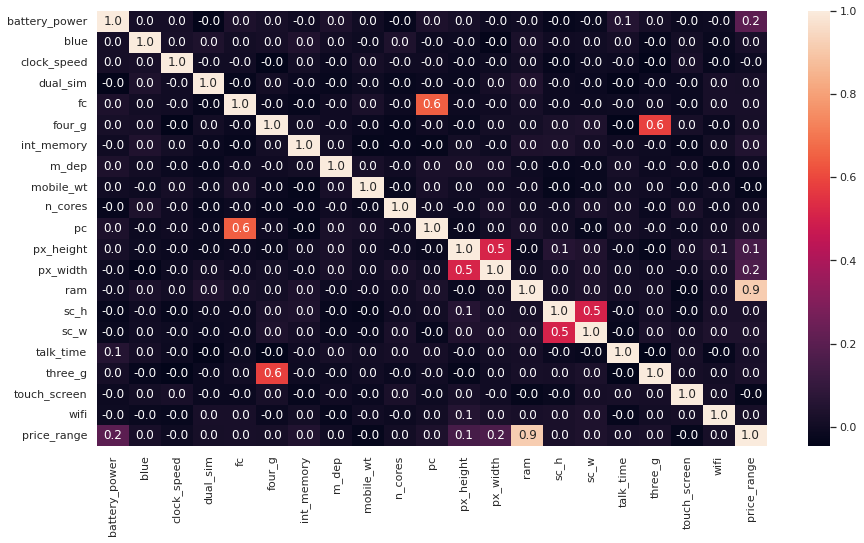

In [ ]:
# plotting Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True,fmt=".1f")



*   There is no highly correlated  data inputs in our dataset, so there is no multicollinearity problem.



**DATA MODELLING**

In [21]:
# assigning independent and dependent variable
x=df.iloc[:, :-1]
y=df.iloc[:,-1]

X is independent variable and y is dependent vriable.

In [22]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [23]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)


In [24]:
#shape of train set
x_train.shape

(1600, 20)

In [25]:
#shape of test set
y_train.shape

(1600,)

In [26]:
# implementing Logistic regression

log_r = LogisticRegression(max_iter = 50000)
log_r.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50000)

In [27]:
y_pred=log_r.predict(x_test)
y_pred

array([2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 1, 1, 0, 1, 1, 1, 3, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 1, 2, 2, 3, 2, 1, 3, 2, 3, 2, 3, 3, 1, 3, 1,
       0, 0, 0, 2, 2, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 2, 2, 3, 1, 2,
       0, 0, 3, 3, 0, 1, 0, 3, 2, 0, 2, 3, 0, 2, 3, 3, 0, 3, 0, 0, 3, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 2, 2, 3, 3, 0, 0, 0, 1, 1, 3, 3, 0, 2, 1, 2, 1,
       3, 2, 2, 0, 3, 2, 2, 1, 1, 2, 0, 2, 1, 0, 3, 3, 1, 2, 0, 3, 2, 2,
       2, 3, 3, 2, 1, 1, 1, 0, 3, 2, 1, 3, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 1, 1, 3, 2, 1, 3, 0, 3, 2, 3, 1, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 2, 0, 3, 2, 1, 1, 0, 2, 1, 3, 1, 2, 1, 0, 2, 2,
       1, 3, 0, 3, 2, 2, 3, 3, 1, 3, 1, 2, 3, 1, 0, 2, 0, 0, 1, 3, 3, 0,
       1, 0, 1, 2, 0, 3, 3, 1, 3, 1, 2, 2, 2, 2, 0, 3, 1, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 2,

Text(0.5, 1.0, 'Confusion Matrix')

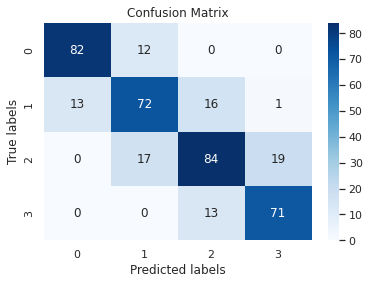

In [28]:
# plotting confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax,cmap="Blues"); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [29]:
# checking accuracy score ,precision score,recall score and F1 score of the model
# Accuracy score
acc_lr = accuracy_score(y_test, y_pred)
print("Accuracy score of the model is",acc_lr)
# precision score
precision_score_lr=precision_score(y_test, y_pred, average=None)
print("presision score of the model is",precision_score_lr)
# recall score
recall_score_lr=recall_score(y_test, y_pred, average=None)
print("Recall score of the model is",recall_score_lr)
# F1 score
f1_score_lr=f1_score(y_test, y_pred, average=None)
print("F1 score of the model is",f1_score_lr)

Accuracy score of the model is 0.7725
presision score of the model is [0.86315789 0.71287129 0.74336283 0.78021978]
Recall score of the model is [0.87234043 0.70588235 0.7        0.8452381 ]
F1 score of the model is [0.86772487 0.70935961 0.72103004 0.81142857]


Our logistic regression model is'nt accurate enough. Lets try implementing decision trees.

**Decision Tree**

In [30]:
# implementing Decision Tree
dt = DecisionTreeClassifier(random_state=40)
dt_model = dt.fit(x_train, y_train)

In [32]:
# prediction
y_pred_dec=dt_model.predict(x_test)
y_pred_dec

array([1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 3, 1,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 2, 2,
       3, 1, 1, 3, 3, 1, 0, 1, 2, 2, 3, 2, 1, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 2, 1, 3, 2, 2, 0, 3, 0, 0, 2, 1, 3, 2, 1, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 2, 1, 1, 1, 0, 1, 3, 2, 1, 2, 1, 3, 1, 0, 2, 2, 0, 3, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 1, 3, 0, 3, 1, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 0, 1, 0, 2, 1, 3, 1, 2, 1, 0, 1, 2,
       1, 3, 0, 3, 3, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 2, 3, 2,
       2, 1, 3, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

Text(0.5, 1.0, 'Confusion Matrix')

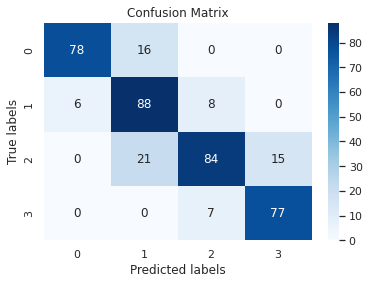

In [33]:
# plotting confusion matrix
confusion_matrix_dis = metrics.confusion_matrix(y_test, y_pred_dis)
ax= plt.subplot()
sns.heatmap(confusion_matrix_dis, annot=True, ax = ax,cmap="Blues"); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [34]:
# checking accuracy score ,precision score,recall score and F1 score of the model
# Accuracy score
acc_dis = accuracy_score(y_test, y_pred_dis)
print("Accuracy score of the model is",acc_dis)
# precision score
precision_score_dis=precision_score(y_test, y_pred_dis, average=None)
print("presision score of the model is",precision_score_dis)
# recall score
recall_score_dis=recall_score(y_test, y_pred_dis, average=None)
print("Recall score of the model is",recall_score_dis)
# F1 score
f1_score_dis=f1_score(y_test, y_pred_dis, average=None)
print("F1 score of the model is",f1_score_dis)

Accuracy score of the model is 0.8175
presision score of the model is [0.92857143 0.704      0.84848485 0.83695652]
Recall score of the model is [0.82978723 0.8627451  0.7        0.91666667]
F1 score of the model is [0.87640449 0.7753304  0.76712329 0.875     ]


Decision tree gives slightly better predictions than the logistic regression model

**Random Forest**

In [35]:
# implementing Random Forest
ran_for = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = ran_for.fit(x_train, y_train)

In [36]:
# predicton
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 3, 0,
       3, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 1, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 2, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 1, 0, 1, 0, 3, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 2, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 2, 1, 3, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

Text(0.5, 1.0, 'Confusion Matrix')

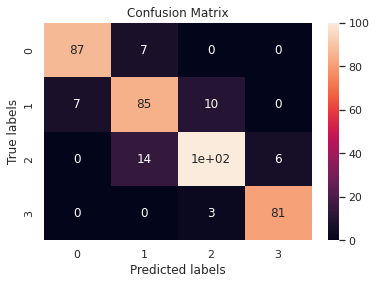

In [38]:
# plotting confusion matrix
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
ax= plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [39]:
# checking accuracy score ,precision score,recall score and F1 score of the model
# Accuracy score
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy score of the model is",acc_rf)
# precision score
precision_score_rf=precision_score(y_test, y_pred_rf, average=None)
print("presision score of the model is",precision_score_rf)
# recall score
recall_score_rf=recall_score(y_test, y_pred_rf, average=None)
print("Recall score of the model is",recall_score_rf)
# F1 score
f1_score_rf=f1_score(y_test, y_pred_rf, average=None)
print("F1 score of the model is",f1_score_rf)

Accuracy score of the model is 0.8825
presision score of the model is [0.92553191 0.80188679 0.88495575 0.93103448]
Recall score of the model is [0.92553191 0.83333333 0.83333333 0.96428571]
F1 score of the model is [0.92553191 0.81730769 0.8583691  0.94736842]


In [40]:
# checking accuracy score of random forest
acc_ran = metrics.accuracy_score(y_test, y_pred_rf)
acc_ran

0.8825

**XGBoost**

In [41]:
# implementing XGBoost
xgb=XGBClassifier()
model_xgb=xgb.fit(x_train,y_train)

In [42]:
# prediction
y_pred_xgb=model_xgb.predict(x_test)
y_pred_xgb

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 2, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 1, 0, 3, 3, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 2, 2, 2, 1, 0, 1, 3, 3, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 3, 1, 2, 2, 0, 1, 2,
       1, 3, 0, 3, 3, 2, 3, 3, 2, 3, 1, 1, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

Text(0.5, 1.0, 'Confusion Matrix')

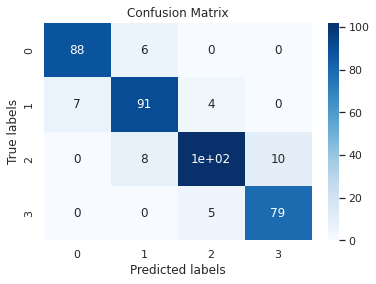

In [43]:
# plotting confusion matrix
confusion_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
ax= plt.subplot()
sns.heatmap(confusion_matrix_xgb, annot=True, ax = ax,cmap="Blues"); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [44]:
# checking accuracy score ,precision score,recall score and F1 score of the model
# Accuracy score
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy score of the model is",acc_xgb)
# precision score
precision_score_xgb=precision_score(y_test, y_pred_xgb, average=None)
print("presision score of the model is",precision_score_rf)
# recall score
recall_score_xgb=recall_score(y_test, y_pred_xgb, average=None)
print("Recall score of the model is",recall_score_xgb)
# F1 score
f1_score_xgb=f1_score(y_test, y_pred_xgb, average=None)
print("F1 score of the model is",f1_score_xgb)

Accuracy score of the model is 0.9
presision score of the model is [0.92553191 0.80188679 0.88495575 0.93103448]
Recall score of the model is [0.93617021 0.89215686 0.85       0.94047619]
F1 score of the model is [0.93121693 0.87922705 0.88311688 0.9132948 ]


**K-Nearest Neighbors**

In [45]:
# implementing KNN
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# prediction
y_pred_knn=model_knn.predict(x_test)
y_pred_knn

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 2, 3, 2, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 3, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 2, 2, 1, 1, 3, 1, 1, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 0, 3, 2, 1, 2, 2, 2, 1, 2, 2, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 3,

Text(0.5, 1.0, 'Confusion Matrix')

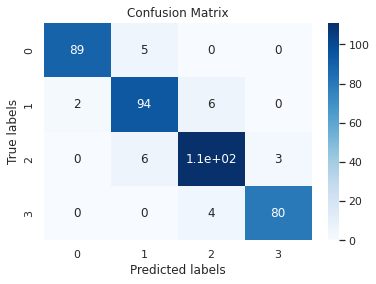

In [47]:
# plotting confusion matrix
confusion_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
ax= plt.subplot()
sns.heatmap(confusion_matrix_knn, annot=True, ax = ax,cmap="Blues"); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [48]:
# checking accuracy score ,precision score,recall score and F1 score of the model
# Accuracy score
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy score of the model is",acc_knn)
# precision score
precision_score_knn=precision_score(y_test, y_pred_knn, average=None)
print("presision score of the model is",precision_score_knn)
# recall score
recall_score_knn=recall_score(y_test, y_pred_knn, average=None)
print("Recall score of the model is",recall_score_knn)
# F1 score
f1_score_knn=f1_score(y_test, y_pred_knn, average=None)
print("F1 score of the model is",f1_score_knn) 


Accuracy score of the model is 0.935
presision score of the model is [0.97802198 0.8952381  0.91735537 0.96385542]
Recall score of the model is [0.94680851 0.92156863 0.925      0.95238095]
F1 score of the model is [0.96216216 0.90821256 0.92116183 0.95808383]


93% accuracy is good but let's check accuracy after hyperparameter tuning.

In [49]:
# hyperperameter tuning through GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [50]:
#best parameter
model.best_params_

{'n_neighbors': 9}

In [51]:
# prediction
y_pred_gridsearch_knn=model.predict(x_test)
y_pred_gridsearch_knn

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 3, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 0, 1, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 3, 2, 3, 1, 2, 3, 2,
       2, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

Text(0.5, 1.0, 'Confusion Matrix')

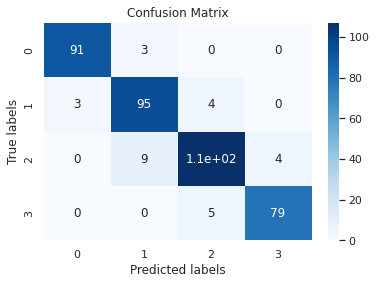

In [52]:
# plotting confusion matrix
confusion_matrix_gridsearch_knn = metrics.confusion_matrix(y_test, y_pred_gridsearch_knn)
ax= plt.subplot()
sns.heatmap(confusion_matrix_gridsearch_knn, annot=True, ax = ax,cmap="Blues"); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [53]:
# model accuracy through gridsearchcv
acc_knn_gridsearch_knn=metrics.accuracy_score(y_test, y_pred_gridsearch_knn)
acc_knn_gridsearch_knn

0.93

Even after hyperparameter tuning we get an accuracy score of 93% , therefore we can conclude that K-Nearest Neighbours has the highest accuracy of 93%

In [54]:
# predicting the price of mobile phones for Test Dataset
x_test["Pice_Range"]=  y_pred_gridsearch_knn
x_test.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Pice_Range
1458,1368,0,0.5,0,10,1,42,0.2,91,1,20,907,925,1590,12,0,14,1,0,0,1
198,609,0,0.5,0,3,0,26,0.3,93,4,4,938,1948,1866,11,10,14,1,1,1,1
1276,586,0,1.4,1,10,1,8,0.5,142,8,14,116,598,3178,9,7,10,1,0,1,2
1243,1180,1,1.2,0,5,1,50,1.0,144,4,20,925,1252,1464,7,3,20,1,1,1,1
1267,896,0,1.0,1,3,1,4,0.3,111,1,4,1379,1469,1060,12,10,4,1,1,1,0
201,1445,1,2.4,1,7,1,20,0.4,173,7,15,1273,1345,1441,7,4,13,1,1,1,1
903,899,1,2.7,0,3,1,53,0.3,192,4,11,641,1638,2870,19,16,10,1,0,1,2
295,1162,0,2.0,0,0,1,56,0.7,114,7,1,56,997,1652,5,0,20,1,0,0,1
1333,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0,1
236,1133,0,1.4,0,3,0,42,0.1,199,5,12,730,1543,1457,18,12,20,1,0,1,1


In [56]:
# accuracy score of each model
Comparision_dict={'Model_Name':['Logistic Regression','Decision Tree','Random forest','XG Boost', 'K-Nearest Neighbors'],
                  'Model_accuracy%':[76,82,88,89,93]}
Comparision_df=pd.DataFrame(Comparision_dict)
Comparision_df

,Model_Name,Model_accuracy%
0,Logistic Regression,76
1,Decision Tree,82
2,Random forest,88
3,XG Boost,89
4,K-Nearest Neighbors,93


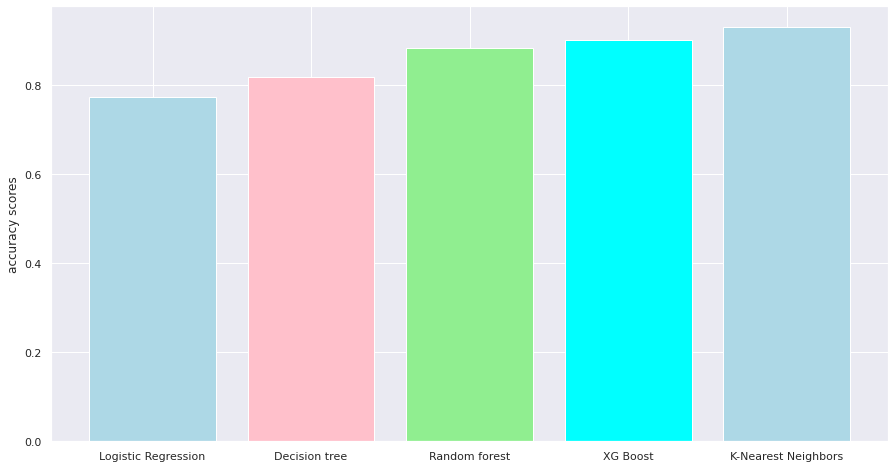

In [57]:
models = ['Logistic Regression', 'Decision tree', 'Random forest','XG Boost','K-Nearest Neighbors']
acc_scores = [acc_lr,acc_dis,acc_rf,acc_xgb,acc_knn_gridsearch_knn]
plt.figure(figsize=(15,8))
sns.set()
plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan',])
plt.ylabel("accuracy scores")
plt.title("")
plt.show()

**CONCLUSION**


*   This data contains information about the specifications of mobile phones and according to that specifications our role is to build a model that can
predict the price of mobile phone.

*   This data contain 2000 rows and 21 columns.

*   Data does not have any null value.

*   Data does not have any outlier




*   Exploratory Data Analysis
        *There are 4 types of mobile phones ,their price range labeled as 0,1,2,3 and all are present in equal counts
        *Almost 50% of the mobile phones have dual sim.
        *Almost 50% of the mobile phones are Touch screen.
        *Almost 50% of the mobile phones have WiFI conectivity.
        *Almost 50% of the mobile phones have bluetooth conectivity.
        *For price range 0,1.2,3 the average megapixel is around 9 to 10 megapixel.
        *The average ram for price range 0,1,2,3 is approx 700,1650,2600 and 3400 megabytes respectively.
        *For price range 0 the avg battery is around 1500 mAh, for price range  1 and 2 it's around 1230 mAh and for price range 3 it's around 1370 mAh.
        *Those mobile phones which are of class 0 are the cheaper phones and those mobiles which comes in class   three are the expensive mobile phones.





*   There is no highly correlated data inputs in our dataset, so there is no multicollinearity problem..
* Then we apply  Logistic Regression ,Decision Tree, Random Forest , XGBoost and K-Nearest Neighbors machine learnig models.

*  The accuracy of logistic regression is 76% and  it was the least accuracy we got among all ML models.


*   The accuracy of Decision tree model is 82% .


*   The accuracy of Random forest model is 88%.


*   The accuracy of XGBoost model is 89%.

*   The accuracy of K-Nearest Neighbors model is 93% 


* So we conclude that K-Nearest Neighbors is our best model.



